# Data Description

 Here Age: Age of the patient

Gender: Gender of the patient(Female=0,Male=1)

exang:exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor
fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

Output : 0= less chance of heart attack 1= more chance of heart attack


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import warnings
from sklearn.metrics import precision_score,recall_score,f1_score
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\WELLCOME\Documents\EduBridge\heart.csv")

In [3]:
data.head(5)

,age,Gender,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.isnull().sum()

age         0
Gender      0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   Gender    303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
data.describe()

,age,Gender,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data.shape

(303, 14)

In [8]:
data.dtypes

age           int64
Gender        int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

<AxesSubplot:xlabel='Gender', ylabel='count'>

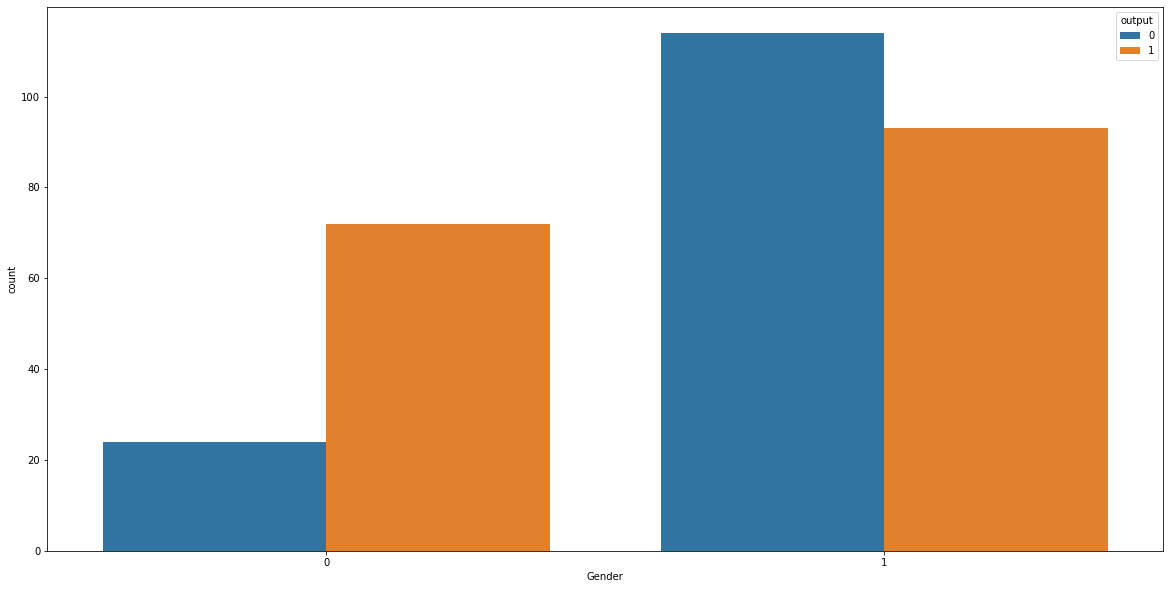

In [10]:
plt.figure(figsize=(20,10))
sns.countplot(x=data["Gender"],hue=data["output"])

### Conclusion : From above plot we observe that there is more chance of heart attack in females.

<AxesSubplot:xlabel='caa', ylabel='count'>

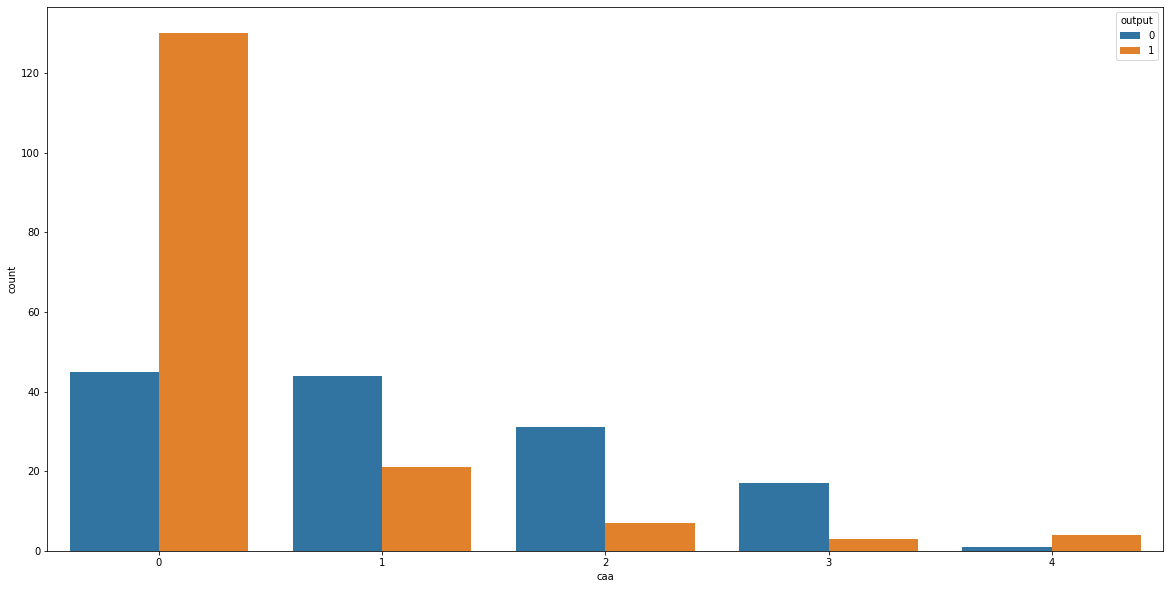

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(x=data["caa"],hue=data["output"])

### Conclusion : from above plot we conclude that there is more chance of heart attack if the number of vessels are zero.

<AxesSubplot:xlabel='cp', ylabel='count'>

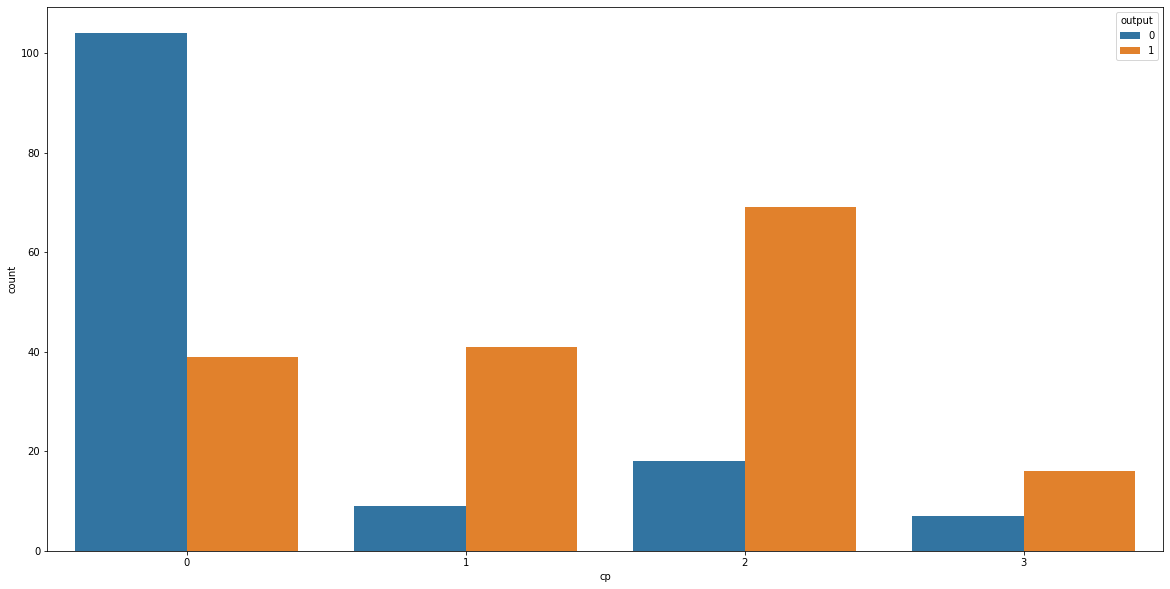

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(x=data["cp"],hue=data["output"])

### Conclusion:From above plot we conclude that there is more chance of heart attack if chest pain is non-anginal pain as compared to other pain type.There is less chance or no chance of heart attack if pain is typical angina.

In [18]:
df=data.drop(['Gender','age'],axis=1)

In [19]:
c=df.corr()
c

,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
cp,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696
slp,0.119717,-0.121475,-0.004038,-0.059894,0.093045,0.386784,-0.257748,-0.577537,1.000000,-0.080155,-0.104764,0.345877
caa,-0.181053,0.101389,0.070511,0.137979,-0.072042,-0.213177,0.115739,0.222682,-0.080155,1.000000,0.151832,-0.391724


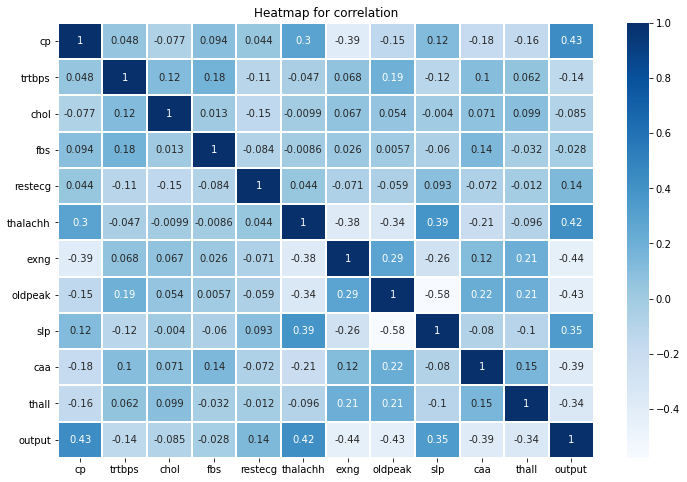

In [20]:
plt.figure(figsize=(12,8))
Heatmap=sns.heatmap(c,linewidth=1,annot=True,cmap=plt.cm.Blues)
plt.title("Heatmap for correlation")
plt.show()

### Conclusion : From heatmap we conclude that there is no high correlation between variables, we can say that multicolinearity does not exists.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X=data.drop('output',axis=1)
Y=data.output
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Decision Tree

In [99]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [100]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [101]:
dt_p=dt.predict(X_test)
dt_p

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [102]:
dt_cf=confusion_matrix(dt_p,Y_test)
dt_cf

array([[24,  5],
       [11, 21]], dtype=int64)

In [103]:
dt_acc=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_acc

73.77049180327869

In [104]:
print(classification_report(dt_p,Y_test))

              precision    recall  f1-score   support

           0       0.69      0.83      0.75        29
           1       0.81      0.66      0.72        32

    accuracy                           0.74        61
   macro avg       0.75      0.74      0.74        61
weighted avg       0.75      0.74      0.74        61



In [105]:
dt_pr=precision_score(dt_p,Y_test)
dt_pr

0.8076923076923077

In [106]:
dt_re=recall_score(dt_p,Y_test)
dt_re

0.65625

In [107]:
dt_f1=f1_score(dt_p,Y_test)
dt_f1

0.7241379310344829

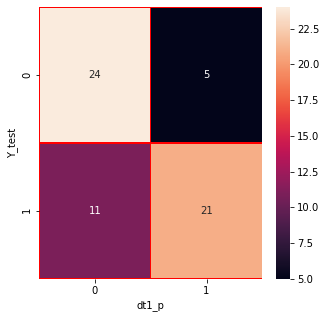

In [108]:
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(dt_cf,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("dt1_p")
plt.ylabel("Y_test")
plt.show()

### Conclusion:The Decision tree Algorithm gives 73% accuracy.

# Random Forest

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [111]:
rf_p=rf.predict(X_test)
rf_p

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [112]:
rf_cf=confusion_matrix(rf_p,Y_test)
rf_cf

array([[27,  5],
       [ 8, 21]], dtype=int64)

In [113]:
rf_acc=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_acc

78.68852459016394

In [114]:
print(classification_report(rf_p,Y_test))

              precision    recall  f1-score   support

           0       0.77      0.84      0.81        32
           1       0.81      0.72      0.76        29

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



In [115]:
rf_re=recall_score(rf_p,Y_test)
rf_re

0.7241379310344828

In [116]:
rf_pr=precision_score(rf_p,Y_test)
rf_pr

0.8076923076923077

In [117]:
rf_f1=f1_score(rf_p,Y_test)
rf_f1

0.7636363636363636

### Conclusion:Here,Random Forest  Model gives 78% accuracy.

# KNN

In [118]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [119]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [120]:
knn_p=knn.predict(X_test)
knn_p

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

In [121]:
knn_cf=confusion_matrix(knn_p,Y_test)
knn_cf

array([[17,  7],
       [18, 19]], dtype=int64)

In [122]:
knn_ac=knn_cf.diagonal().sum()/knn_cf.sum()*100
knn_ac

59.01639344262295

In [123]:
print(classification_report(knn_p,Y_test))

              precision    recall  f1-score   support

           0       0.49      0.71      0.58        24
           1       0.73      0.51      0.60        37

    accuracy                           0.59        61
   macro avg       0.61      0.61      0.59        61
weighted avg       0.63      0.59      0.59        61



In [124]:
knn_pr=precision_score(knn_p,Y_test)
knn_pr

0.7307692307692307

In [125]:
knn_re=recall_score(knn_p,Y_test)
knn_re

0.5135135135135135

In [126]:
knn_f1=f1_score(knn_p,Y_test)
knn_f1

0.6031746031746031

### Conclusion:The KNN Algorithm gives 59% accuracy

# Support Vector Machine

In [127]:
from sklearn.svm import SVC

In [128]:
svc=SVC()
svc.fit(X_train,Y_train)

SVC()

In [129]:
svc_p=svc.predict(X_test)
svc_p

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [130]:
svc_ac=svc_cf.diagonal().sum()/svc_cf.sum()*100
svc_ac

59.01639344262295

In [131]:
svc_cf=confusion_matrix(svc_p,Y_test)
svc_cf

array([[13,  3],
       [22, 23]], dtype=int64)

In [132]:
print(classification_report(svc_p,Y_test))

              precision    recall  f1-score   support

           0       0.37      0.81      0.51        16
           1       0.88      0.51      0.65        45

    accuracy                           0.59        61
   macro avg       0.63      0.66      0.58        61
weighted avg       0.75      0.59      0.61        61



In [133]:
svc_pr=precision_score(svc_p,Y_test)
svc_pr

0.8846153846153846

In [134]:
svc_re=recall_score(svc_p,Y_test)
svc_re

0.5111111111111111

In [135]:
svc_f1=f1_score(svc_p,Y_test)
svc_f1

0.6478873239436619

### Conclusion :The Support Vector Machine Algorithm gives 59% accuracy

In [136]:
from sklearn.ensemble import GradientBoostingClassifier

In [137]:
gb=GradientBoostingClassifier()
gb.fit(X_train,Y_train)

GradientBoostingClassifier()

In [138]:
gb_p=gb.predict(X_test)
gb_p

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [139]:
gb_cf=confusion_matrix(gb_p,Y_test)
gb_cf

array([[28,  5],
       [ 7, 21]], dtype=int64)

In [140]:
gb_ac=gb_cf.diagonal().sum()/gb_cf.sum()*100
gb_ac

80.32786885245902

In [141]:
print(classification_report(gb_p,Y_test))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        33
           1       0.81      0.75      0.78        28

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [142]:
gb_pr=precision_score(gb_p,Y_test)
gb_pr

0.8076923076923077

In [143]:
gb_re=recall_score(gb_p,Y_test)
gb_re

0.75

In [144]:
gb_f1=f1_score(gb_p,Y_test)
gb_f1

0.7777777777777779

### Conclusion: Gradient Boosting gives 80% accuracy.

In [145]:
list1=["DECISION TREE","RANDOM FOREST","KNN","SVM","GRADIENT BOOSTING"]
list2=[dt_acc,rf_acc,knn_ac,svc_ac,gb_ac]
list3=[dt_pr,rf_pr,knn_pr,svc_pr,gb_pr]
list4=[dt_re,rf_re,knn_re,svc_re,gb_re]
list5=[dt_f1,rf_f1,knn_f1,svc_f1,gb_f1]

In [146]:
df2=pd.DataFrame({"Model Name":list1,"Accuracy":list2,"Precision":list3,"Recall":list4,"F1_score":list5})
df2

,Model Name,Accuracy,Precision,Recall,F1_score
0,DECISION TREE,73.770492,0.807692,0.656250,0.724138
1,RANDOM FOREST,78.688525,0.807692,0.724138,0.763636
2,KNN,59.016393,0.730769,0.513514,0.603175
3,SVM,59.016393,0.884615,0.511111,0.647887
4,GRADIENT BOOSTING,80.327869,0.807692,0.750000,0.777778


### Conclusion:Here,we get Gradient Boosting is best model because it gives 80% accuracy.